In [40]:
import pandas as pd

In [41]:
automobile_data = pd.read_csv(
    "datasets/Automobile_data.csv", sep=r"\s*,\s*", engine="python"
)

In [42]:
automobile_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [43]:
import numpy as np

In [44]:
automobile_data = automobile_data.replace("?", np.nan)
automobile_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [45]:
automobile_data = automobile_data.dropna()
automobile_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.5,2.8,8.8,101,5800,23,29,16430


In [46]:
col = ["make", "fuel-type", "body-style", "horsepower"]
automobile_features = automobile_data[col]

In [47]:
automobile_features.head()

,make,fuel-type,body-style,horsepower
3,audi,gas,sedan,102
4,audi,gas,sedan,115
6,audi,gas,sedan,110
8,audi,gas,sedan,140
10,bmw,gas,sedan,101


In [48]:
automobile_target = automobile_data[["price"]]

In [49]:
automobile_target.head()

,price
3,13950
4,17450
6,17710
8,23875
10,16430


In [50]:
automobile_features["horsepower"].describe()

count     159
unique     48
top        68
freq       18
Name: horsepower, dtype: object

In [51]:
pd.options.mode.chained_assignment = None  # turn off settingwithcopywarning

In [52]:
automobile_features["horsepower"] = pd.to_numeric(automobile_features["horsepower"])

In [53]:
automobile_features["horsepower"].describe()

count    159.000000
mean      95.836478
std       30.718583
min       48.000000
25%       69.000000
50%       88.000000
75%      114.000000
max      200.000000
Name: horsepower, dtype: float64

In [54]:
automobile_target["price"].describe()

count       159
unique      145
top       18150
freq          2
Name: price, dtype: object

In [55]:
automobile_target = automobile_target.astype(float)

In [56]:
automobile_target["price"].describe()

count      159.000000
mean     11445.729560
std       5877.856195
min       5118.000000
25%       7372.000000
50%       9233.000000
75%      14719.500000
max      35056.000000
Name: price, dtype: float64

In [57]:
automobile_features = pd.get_dummies(
    automobile_features, columns=["make", "fuel-type", "body-style"]
)

In [58]:
automobile_features.head()

,horsepower,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_jaguar,make_mazda,make_mercedes-benz,make_mitsubishi,...,make_toyota,make_volkswagen,make_volvo,fuel-type_diesel,fuel-type_gas,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon
3,102,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,115,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
6,110,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
8,140,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
10,101,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [59]:
automobile_features.columns

Index(['horsepower', 'make_audi', 'make_bmw', 'make_chevrolet', 'make_dodge',
       'make_honda', 'make_jaguar', 'make_mazda', 'make_mercedes-benz',
       'make_mitsubishi', 'make_nissan', 'make_peugot', 'make_plymouth',
       'make_porsche', 'make_saab', 'make_subaru', 'make_toyota',
       'make_volkswagen', 'make_volvo', 'fuel-type_diesel', 'fuel-type_gas',
       'body-style_convertible', 'body-style_hardtop', 'body-style_hatchback',
       'body-style_sedan', 'body-style_wagon'],
      dtype='object')

In [60]:
from sklearn import preprocessing

In [61]:
automobile_features[["horsepower"]] = preprocessing.scale(
    automobile_features[["horsepower"]]
)

In [62]:
automobile_features[["horsepower"]].head()

,horsepower
3,0.201279
4,0.625812
6,0.462530
8,1.442223
10,0.168622


In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train, x_test, Y_train, y_test = train_test_split(
    automobile_features, automobile_target, test_size=0.2, random_state=0
)

In [65]:
import torch

In [66]:
dtype = torch.float

In [67]:
X_train_tensor = torch.tensor(X_train.values, dtype=dtype)
x_test_tensor = torch.tensor(x_test.values, dtype=dtype)

In [68]:
Y_train_tensor = torch.tensor(Y_train.values, dtype=dtype)
y_test_tensor = torch.tensor(y_test.values, dtype=dtype)

In [69]:
X_train_tensor.shape

torch.Size([127, 26])

In [70]:
Y_train_tensor.shape

torch.Size([127, 1])

In [71]:
inp = 26
out = 1
hid = 100
loss_fn = torch.nn.MSELoss()
learning_rate = 0.0001

In [72]:
model = torch.nn.Sequential(
    torch.nn.Linear(inp, hid),
    torch.nn.Sigmoid(),
    torch.nn.Linear(hid, out),
)

In [73]:
for iter in range(10000):
    y_pred = model(X_train_tensor)
    loss = loss_fn(y_pred, Y_train_tensor)

    if iter % 1000 == 0:
        print(iter, loss.item())

    model.zero_grad()
    loss.backward()

    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

0 168088016.0
1000 4278141.0
2000 2427540.75
3000 1713950.75
4000 1472967.0
5000 1318954.25
6000 1212695.25
7000 1141817.75
8000 1090063.875
9000 1050476.25


In [74]:
sample = x_test.iloc[23]
sample

horsepower               -0.353881
make_audi                 0.000000
make_bmw                  0.000000
make_chevrolet            0.000000
make_dodge                0.000000
make_honda                0.000000
make_jaguar               0.000000
make_mazda                0.000000
make_mercedes-benz        0.000000
make_mitsubishi           0.000000
make_nissan               0.000000
make_peugot               0.000000
make_plymouth             0.000000
make_porsche              0.000000
make_saab                 0.000000
make_subaru               0.000000
make_toyota               0.000000
make_volkswagen           1.000000
make_volvo                0.000000
fuel-type_diesel          0.000000
fuel-type_gas             1.000000
body-style_convertible    0.000000
body-style_hardtop        0.000000
body-style_hatchback      0.000000
body-style_sedan          1.000000
body-style_wagon          0.000000
Name: 186, dtype: float64

In [75]:
sample_tensor = torch.tensor(sample.values, dtype=dtype)
sample_tensor

tensor([-0.3539,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  1.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000,
         1.0000,  0.0000])

In [76]:
y_pred = model(sample_tensor)
print("Predicted price of automobile is : ", int(y_pred.item()))
print("Actual price of automobile is : ", int(y_test.iloc[23]))

Predicted price of automobile is :  8105
Actual price of automobile is :  8495


In [77]:
y_pred_tensor = model(x_test_tensor)

In [78]:
y_pred = y_pred_tensor.detach().numpy()

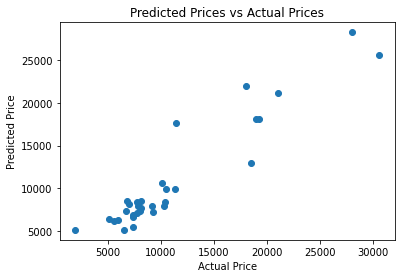

In [79]:
import matplotlib.pyplot as plt

plt.scatter(y_pred, y_test.values)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")

plt.title("Predicted Prices vs Actual Prices")
plt.show()

In [80]:
torch.save(model, "my_model")

In [81]:
saved_model = torch.load("my_model")

In [82]:
y_pred_tensor = saved_model(x_test_tensor)

In [83]:
y_pred = y_pred_tensor.detach().numpy()

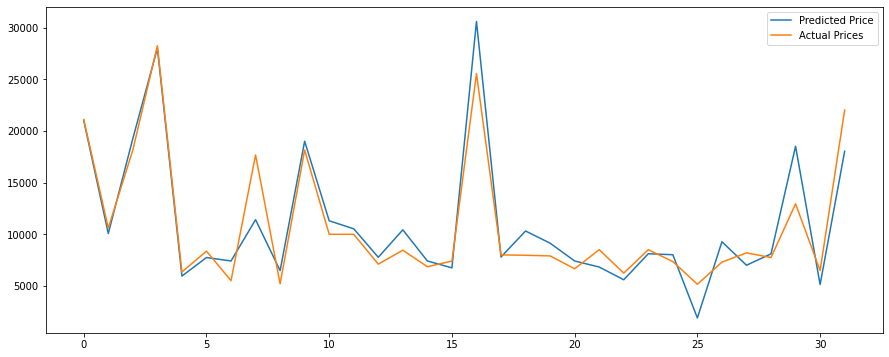

In [85]:
plt.figure(figsize=(15, 6))

plt.plot(y_pred, label="Predicted Price")
plt.plot(y_test.values, label="Actual Prices")

plt.legend()
plt.show()